#Закрепление знаний

Представлены данные об оттоке клиентов некоторого банка.



In [59]:
#Импортируем нужные библиотеки
import pandas as pd
import plotly as pl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use('default')

churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [60]:
#Удаляем ненужный столбец 'RowNumber'
churn_data = churn_data.drop(labels='RowNumber', axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##ЗАДАНИЯ

###Задание 9.1. 
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [61]:
exited_data = churn_data.groupby('Exited')['Exited'].count()
display(exited_data)

Exited
0    7963
1    2037
Name: Exited, dtype: int64

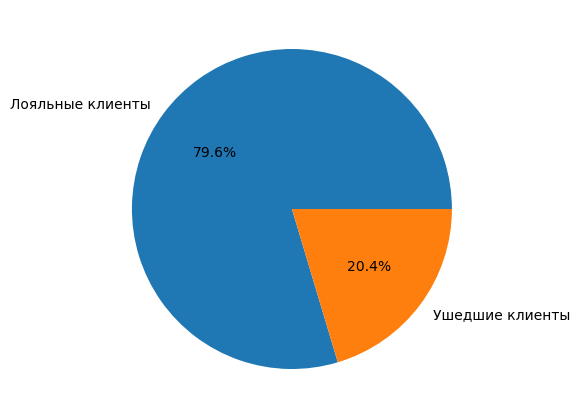

In [62]:
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_data,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%.1f%%',
    
);

На диаграмме видно, что ушедших клиентов гораздо меньше, чем лояльных.

###Задание 9.2. 
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [63]:
over_2500 = churn_data[churn_data['Balance']>2500]['Balance']
over_2500.head()

1     83807.86
2    159660.80
4    125510.82
5    113755.78
7    115046.74
Name: Balance, dtype: float64

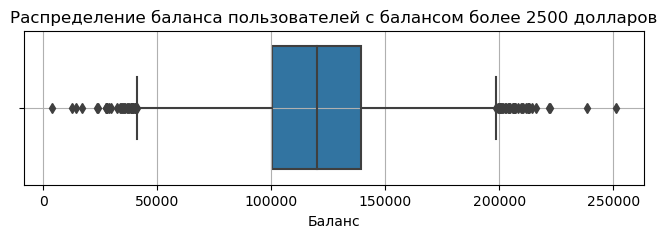

In [64]:
fig = plt.figure(figsize=(8, 2))
boxplot = sns.boxplot(
    data=over_2500,
    x=over_2500.values,
    orient='h',
)
boxplot.set_title('Распределение баланса пользователей с балансом более 2500 долларов');
boxplot.set_xlabel('Баланс');
boxplot.grid()

Распределение значений баланса пользователей равномерное. Основная масса значений лежит в диапазоне от 40000 до 195000 долларов. Медианное значение баланса приблизительно 120000 долларов. Половина значений лежит в диапазоне 100000 - 1300000 долларов.

###Задание 9.3. 
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

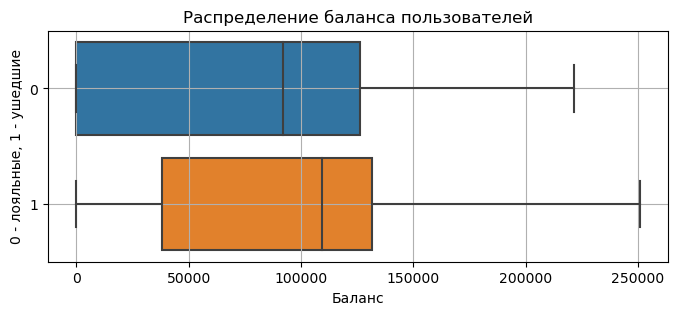

In [65]:
fig = plt.figure(figsize=(8, 3))
boxplot = sns.boxplot(
    data=churn_data,
    x='Balance',
    y='Exited',
    orient='h',    
)
boxplot.set_title('Распределение баланса пользователей');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('0 - лояльные, 1 - ушедшие');
boxplot.grid()

Медианное значение баланса ушедших пользователей 110000 долларов, лояльных 90000 долларов. Условия банка могут быть менее выгодными для пользователей с балансом выше 100000 долларов.

###Дополнительное задание 9.3 Можно построить гистограмму распределения, на ней хорошо видно большое кол-во лояльных и ушедших клиентов с нулевым балансом.


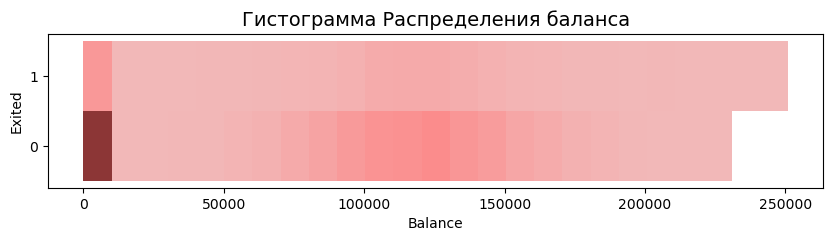

In [84]:
fig, axes = plt.subplots(figsize=(10, 2))

churn_data['Exited'] = churn_data['Exited'].astype('string')

axes.set_title('Гистограмма Распределения баланса', fontsize=14)
sns.histplot(
    data=churn_data,
    x='Balance',
    y='Exited',
    bins=25,
    color='red',
    
);

Большое кол-во лояльных и ушедших клиентов с нулевым балансом.

###Задание 9.4. 
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

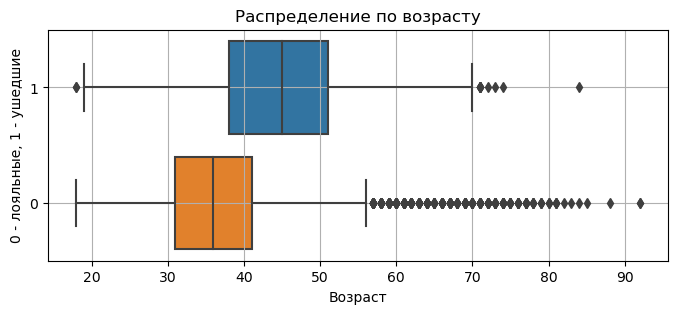

In [67]:
fig = plt.figure(figsize=(8, 3))
boxplot = sns.boxplot(
    data=churn_data,
    x='Age',
    y='Exited',
    orient='h',    
)
boxplot.set_title('Распределение по возрасту');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('0 - лояльные, 1 - ушедшие');
boxplot.grid()

Потенциальных выбросов по возрасту больше среди лояльных клиентов (возраст более 57 лет). Медианный возраст среди ушедших - 45 лет. Банку стоит обратить внимание на людей в возрасте 38 - 51 год.

###Доплнительное задание 9.4 Интересно посмотреть на распределение клиентов с нулевым балансом отдельно.


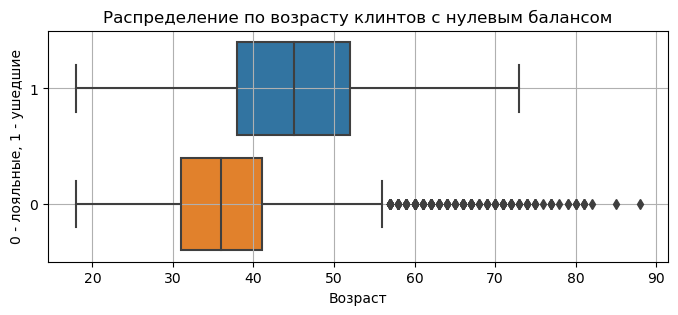

In [68]:
null_balance_data = churn_data[churn_data['Balance']==0]

fig = plt.figure(figsize=(8, 3))
boxplot = sns.boxplot(
    data=null_balance_data,
    x='Age',
    y='Exited',
    orient='h',    
)
boxplot.set_title('Распределение по возрасту клинтов с нулевым балансом');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('0 - лояльные, 1 - ушедшие');
boxplot.grid()

Распределение по  возрасту клиентов с нулевым балансом практически не отличается от общего распределения.

###Задание 9.5. 
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [69]:
churn_data['Exited'] = churn_data['Exited'].astype('string')

fig = px.scatter(
    
    data_frame=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    #log_x=True,
    height=700, 
    width=1000,
    color='Exited',
    title='Зависимость кредитного рейтинга клиента от его предполагаемой зарплаты. 0 - лояльные, 1 - ушедшие',
    
)

fig.show()


Между признаками нет явной зависимости. Это может значить, что рейтинг клиента не зависит от его предполагаемой зарплаты. Существует порог рейтинга в 400 единиц для лояльных пользователей.

###Задание 9.6. 
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [70]:
churn_data['Exited'] = churn_data['Exited'].astype('int')

gender_data = churn_data[churn_data['Exited']==1].groupby('Gender')['Gender'].count()
gender_data

Gender
Female    1139
Male       898
Name: Gender, dtype: int64

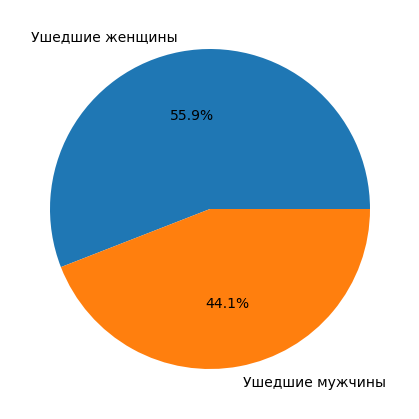

In [71]:
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    gender_data,
    labels=['Ушедшие женщины', 'Ушедшие мужчины'],
    autopct='%.1f%%',
);

Среди ушедших клинтов женщин несколько больше, чем мужчин.

###Задание 9.7. 
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [72]:
num_of_prod_data = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False)['CustomerId'].count()

num_of_prod_data['Exited'] = num_of_prod_data['Exited'].replace([0,1],['loyal','exited'])

num_of_prod_data

,NumOfProducts,Exited,CustomerId
0,1,loyal,3675
1,1,exited,1409
2,2,loyal,4242
3,2,exited,348
4,3,loyal,46
5,3,exited,220
6,4,exited,60


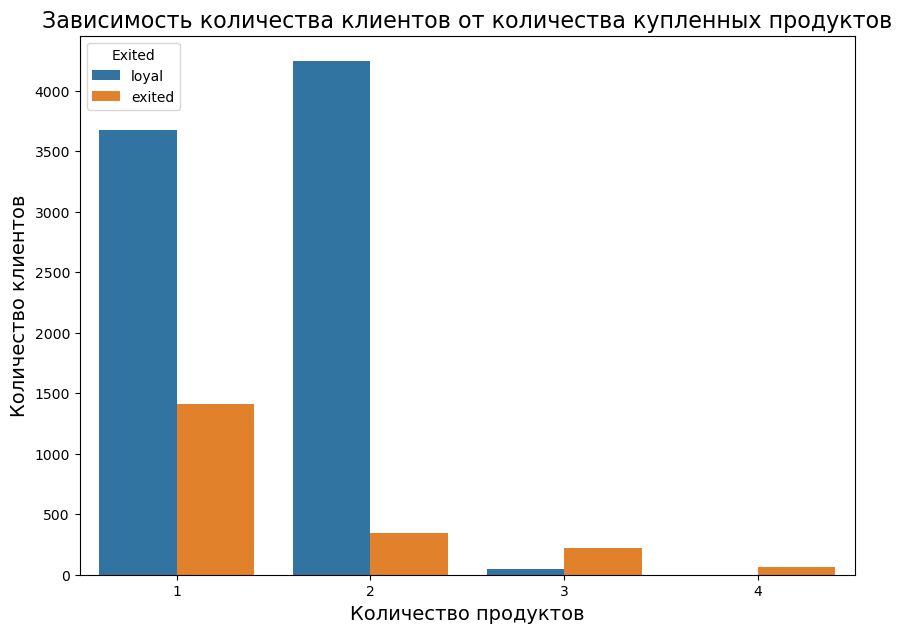

In [73]:
fig, axes = plt.subplots(figsize=(10, 7))

fig = sns.barplot(
    data=num_of_prod_data,
    x='NumOfProducts',
    y='CustomerId',
    hue='Exited',
)
fig.set_title('Зависимость количества клиентов от количества купленных продуктов', fontsize=16);
fig.set_xlabel('Количество продуктов', fontsize=14);
fig.set_ylabel('Количество клиентов', fontsize=14);


Наибольшее количество лояльных клиентов по отношению к ушедшим в группе с двумя купленными продуктами. С дальнейшим увеличением количетва продуктов доля ушедших резко возрастает. Лояльных клиетов с четырьмя купленными продуктами нет вовсе.

###Задание 9.8. 
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [74]:
is_active_data = churn_data.groupby(['IsActiveMember', 'Exited'], as_index=False)['CustomerId'].count()

is_active_data['IsActiveMember'] = is_active_data['IsActiveMember'].replace([0,1],['not active','active'])

is_active_data['Exited'] = is_active_data['Exited'].replace([0,1],['loyal','exited'])

is_active_data

,IsActiveMember,Exited,CustomerId
0,not active,loyal,3547
1,not active,exited,1302
2,active,loyal,4416
3,active,exited,735


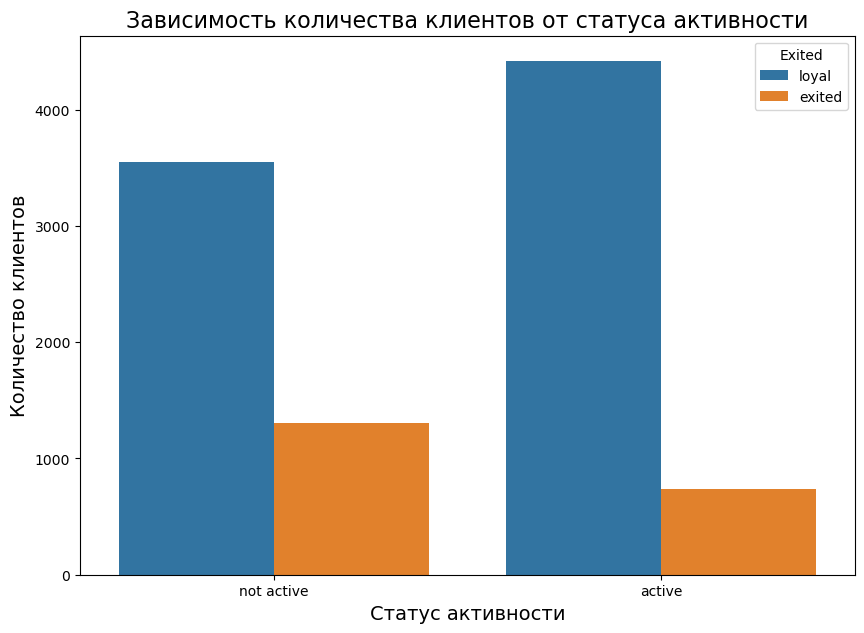

In [75]:
fig, axes = plt.subplots(figsize=(10, 7))

fig = sns.barplot(
    data=is_active_data,
    x='IsActiveMember',
    y='CustomerId',
    hue='Exited',
)
fig.set_title('Зависимость количества клиентов от статуса активности', fontsize=16);
fig.set_xlabel('Статус активности', fontsize=14);
fig.set_ylabel('Количество клиентов', fontsize=14);

Среди активных клиентов доля ушедших меньше, чем у клиентов без этого статуса. Банку следует предложить более привлекательные условия для неактивных клиентов, поскольку доля ушедших среди них около 1/3.

###Задание 9.9. 
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [76]:
map_exited_data = churn_data.groupby('Geography', as_index=False)['Exited'].mean()

map_exited_data

,Geography,Exited
0,France,0.161548
1,Germany,0.324432
2,Spain,0.166734


In [77]:
fig = px.choropleth(
    data_frame=map_exited_data, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    #animation_frame="date", #анимационный бегунок
    range_color=[0, 0.5], #диапазон цвета
    title='Распределение доли ушедших по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

В Германии доля ушедших приблизительно в два раза больше, чем в Испании и Франции. Это может быть связано с более высоким средним возрастом в Германии, где он совпадает с медианным возрастом среди ушедших клиентов. 

###Задание 9.10. 

Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [78]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [79]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent


In [80]:
tenure_data = churn_data.groupby(['CreditScoreCat','Tenure'])['Exited'].mean().unstack()

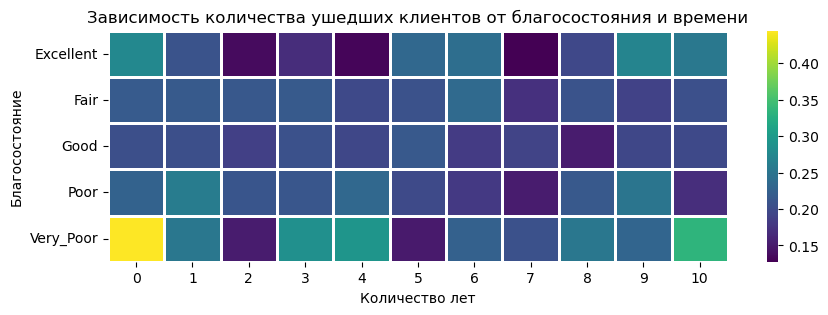

In [81]:
fig, axes = plt.subplots(figsize=(10, 3))
fig = sns.heatmap(
    tenure_data,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    
)
fig.set_title('Зависимость количества ушедших клиентов от благосостояния и времени');
fig.set_xlabel('Количество лет');
fig.set_ylabel('Благосостояние');


Чаще всего уходят клинты с самым низким кредитным рейтингом в течение первого года.

###Дополнительное задание 9.5. Интересно посмотреть зависимость средней зп от рейтинга.


In [82]:
score_cat_data = churn_data.groupby('CreditScoreCat', as_index=False)['EstimatedSalary'].mean()
display(score_cat_data)

,CreditScoreCat,EstimatedSalary
0,Excellent,101947.790979
1,Fair,100615.809597
2,Good,99836.002331
3,Poor,98424.113681
4,Very_Poor,103307.478418


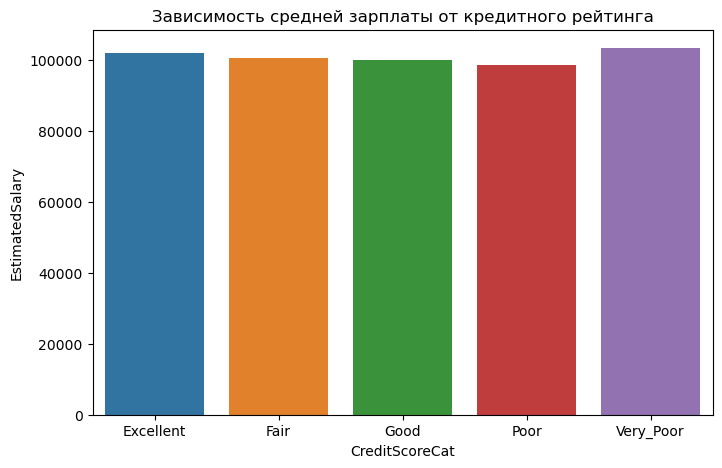

In [83]:
fig = plt.figure(figsize=(8, 5))

barplot = sns.barplot(
    data=score_cat_data,
    x='CreditScoreCat',
    y='EstimatedSalary',
    
)
barplot.set_title('Зависимость средней зарплаты от кредитного рейтинга');

Средняя запрлата не зависит от рейтинга.